In [2]:
# ==========================================
#   Health Outcomes vs Access & Infrastructure
# ==========================================

from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------------------------
# 1. Auto-detect project root
# ------------------------------------------------
def find_project_root(marker="README.md"):
    cur = Path().resolve()
    while cur != cur.parent:
        if (cur / marker).exists():
            return cur
        cur = cur.parent
    raise RuntimeError("Project root not found. Make sure README.md is at project root.")

ROOT = find_project_root()
DB_PATH = ROOT / "data" / "db" / "global_health_nutrition.db"

print("PROJECT ROOT:", ROOT)
print("DATABASE PATH:", DB_PATH)
print("DB Exists:", DB_PATH.exists())

PROJECT ROOT: F:\data-analysis_startup\global_health_nutrition_analysis
DATABASE PATH: F:\data-analysis_startup\global_health_nutrition_analysis\data\db\global_health_nutrition.db
DB Exists: True


In [3]:
# ------------------------------------------------
# 2. Load v_health_access view
# ------------------------------------------------
conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query("SELECT * FROM v_health_access;", conn)
conn.close()

print("Rows in v_health_access:", len(df))
display(df.head())

Rows in v_health_access: 8430


,country,year,life_expectancy,infant_mortality_rate,under5_mortality_rate,uhc_coverage,doctors,nurses_midwifes,basic_water,basic_sanitation_total,safely_sanitation_total,clean_fuel
0,Afghanistan,1990.0,50.351333,120.266667,177.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1991.0,51.018667,116.666667,171.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1992.0,51.661667,113.166667,165.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1993.0,52.277667,109.833333,160.366667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1994.0,52.866667,106.633333,155.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ------------------------------------------------
# 3. Basic overview
# ------------------------------------------------
print("Shape:", df.shape)
print("Columns:\n", df.columns.tolist())
print("\nYears:", df["year"].min(), "→", df["year"].max())
print("Countries:", df["country"].nunique())

display(df.describe().T.head(15))

Shape: (8430, 12)
Columns:
 ['country', 'year', 'life_expectancy', 'infant_mortality_rate', 'under5_mortality_rate', 'uhc_coverage', 'doctors', 'nurses_midwifes', 'basic_water', 'basic_sanitation_total', 'safely_sanitation_total', 'clean_fuel']

Years: 1990.0 → 2019.0
Countries: 281


,count,mean,std,min,25%,50%,75%,max
year,8430.0,2004.500000,8.655955,1990.000000,1997.000000,2004.500000,2012.000000,2019.000000
life_expectancy,8430.0,69.475654,9.305378,26.192333,64.301333,71.728654,76.347500,86.751000
infant_mortality_rate,5019.0,33.078259,31.776973,1.490000,8.360000,21.013333,48.676667,176.300000
under5_mortality_rate,5019.0,47.398223,52.685795,1.680000,9.798333,24.776667,67.576667,328.566667
uhc_coverage,358.0,63.231844,15.763639,22.000000,49.000000,68.000000,76.000000,89.000000
doctors,2452.0,20.779784,14.394516,0.130000,7.770000,21.350000,31.915000,84.220000
nurses_midwifes,2532.0,49.085968,85.414896,0.012000,11.850000,37.875000,66.735000,1853.000000
basic_water,3374.0,77.936669,24.000640,10.130000,60.145000,87.745000,98.450000,100.000000
basic_sanitation_total,3367.0,71.451384,30.358413,3.400000,45.925000,85.630000,97.670000,100.000000
safely_sanitation_total,1535.0,63.864938,29.561563,3.160000,38.270000,74.100000,91.255000,100.000000


In [5]:
# ------------------------------------------------
# 4. Latest year slice
# ------------------------------------------------
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year].copy()

print(f"\nLatest year: {latest_year}, rows: {len(df_latest)}")
display(df_latest.head())


Latest year: 2019.0, rows: 281


,country,year,life_expectancy,infant_mortality_rate,under5_mortality_rate,uhc_coverage,doctors,nurses_midwifes,basic_water,basic_sanitation_total,safely_sanitation_total,clean_fuel
29,Afghanistan,2019.0,64.867667,46.453333,60.223333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Africa,2019.0,63.177000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Albania,2019.0,78.592000,8.596667,9.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Algeria,2019.0,76.896333,19.930000,23.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,American Samoa,2019.0,73.745000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


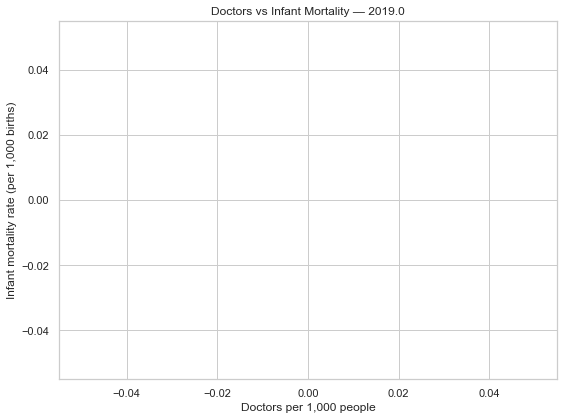

In [6]:
# ------------------------------------------------
# 5. Doctors vs Infant Mortality
# ------------------------------------------------
if {"doctors", "infant_mortality_rate"}.issubset(df_latest.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_latest,
        x="doctors",
        y="infant_mortality_rate"
    )
    plt.xlabel("Doctors per 1,000 people")
    plt.ylabel("Infant mortality rate (per 1,000 births)")
    plt.title(f"Doctors vs Infant Mortality — {latest_year}")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Doctors vs Infant Mortality' plot because required columns are missing.")

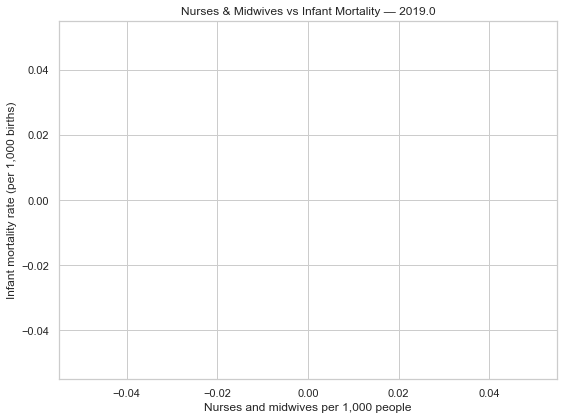

In [7]:
# ------------------------------------------------
# 6. Nurses vs Infant Mortality
# ------------------------------------------------
if {"nurses_midwifes", "infant_mortality_rate"}.issubset(df_latest.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_latest,
        x="nurses_midwifes",
        y="infant_mortality_rate"
    )
    plt.xlabel("Nurses and midwives per 1,000 people")
    plt.ylabel("Infant mortality rate (per 1,000 births)")
    plt.title(f"Nurses & Midwives vs Infant Mortality — {latest_year}")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Nurses vs Infant Mortality' plot because required columns are missing.")

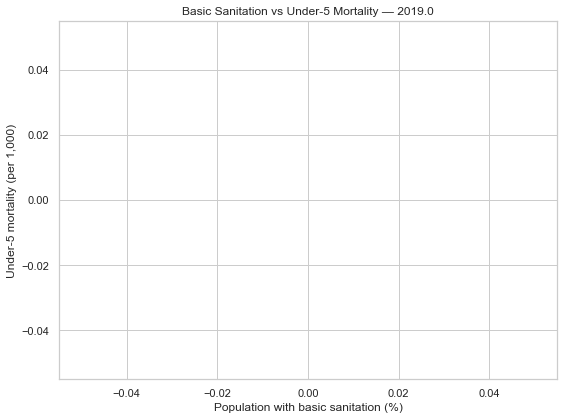

In [8]:
# ------------------------------------------------
# 7. Sanitation vs Under-5 Mortality
# ------------------------------------------------
if {"basic_sanitation_total", "under5_mortality_rate"}.issubset(df_latest.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_latest,
        x="basic_sanitation_total",
        y="under5_mortality_rate"
    )
    plt.xlabel("Population with basic sanitation (%)")
    plt.ylabel("Under-5 mortality (per 1,000)")
    plt.title(f"Basic Sanitation vs Under-5 Mortality — {latest_year}")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Sanitation vs Under-5 Mortality' plot because required columns are missing.")

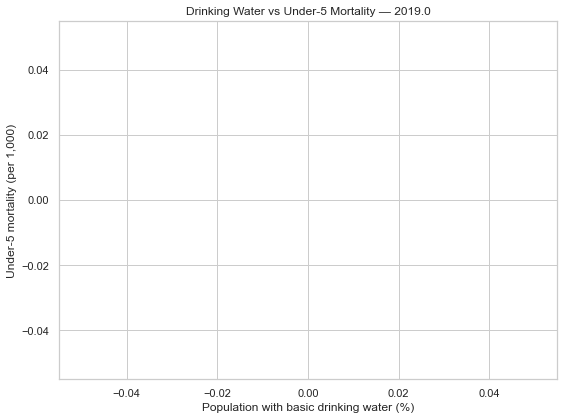

In [9]:
# ------------------------------------------------
# 8. Water vs Under-5 Mortality
# ------------------------------------------------
if {"basic_water", "under5_mortality_rate"}.issubset(df_latest.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_latest,
        x="basic_water",
        y="under5_mortality_rate"
    )
    plt.xlabel("Population with basic drinking water (%)")
    plt.ylabel("Under-5 mortality (per 1,000)")
    plt.title(f"Drinking Water vs Under-5 Mortality — {latest_year}")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Water vs Under-5 Mortality' plot because required columns are missing.")


UHC Coverage bins summary:


,uhc_bin,life_expectancy,under5_mortality,n
0,0–40,NaN,NaN,0
1,40–60,NaN,NaN,0
2,60–80,NaN,NaN,0
3,80–100,NaN,NaN,0


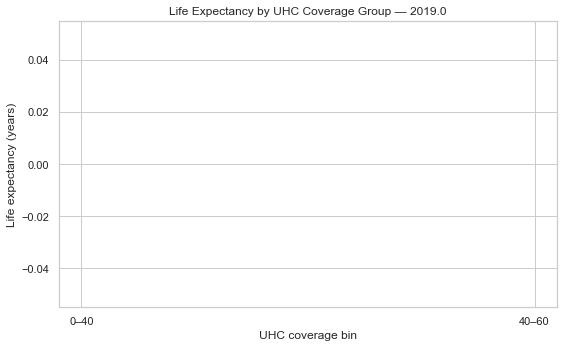

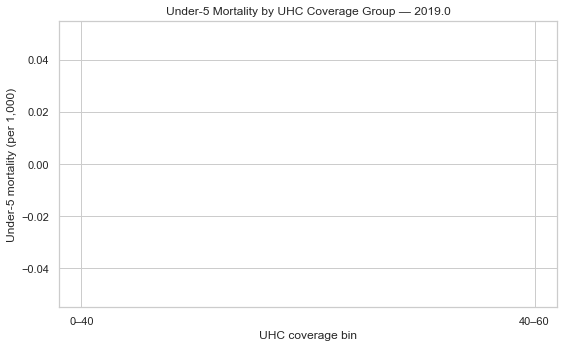

In [10]:
# ------------------------------------------------
# 9. UHC Coverage bins vs Outcomes
# ------------------------------------------------
if "uhc_coverage" in df_latest.columns:
    df_latest["uhc_bin"] = pd.cut(
        df_latest["uhc_coverage"],
        bins=[0, 40, 60, 80, 100],
        labels=["0–40", "40–60", "60–80", "80–100"],
        include_lowest=True
    )

    group_cols = {"life_expectancy", "under5_mortality_rate"} & set(df_latest.columns)
    agg_dict = {}
    if "life_expectancy" in group_cols:
        agg_dict["life_expectancy"] = ("life_expectancy", "mean")
    if "under5_mortality_rate" in group_cols:
        agg_dict["under5_mortality"] = ("under5_mortality_rate", "mean")

    agg_dict["n"] = ("country", "count")

    grouped = (
        df_latest
        .groupby("uhc_bin")
        .agg(**agg_dict)
        .reset_index()
    )

    print("\nUHC Coverage bins summary:")
    display(grouped)

    if "life_expectancy" in grouped.columns:
        plt.figure(figsize=(8, 5))
        plt.bar(grouped["uhc_bin"].astype(str), grouped["life_expectancy"])
        plt.xlabel("UHC coverage bin")
        plt.ylabel("Life expectancy (years)")
        plt.title(f"Life Expectancy by UHC Coverage Group — {latest_year}")
        plt.tight_layout()
        plt.show()

    if "under5_mortality" in grouped.columns:
        plt.figure(figsize=(8, 5))
        plt.bar(grouped["uhc_bin"].astype(str), grouped["under5_mortality"])
        plt.xlabel("UHC coverage bin")
        plt.ylabel("Under-5 mortality (per 1,000)")
        plt.title(f"Under-5 Mortality by UHC Coverage Group — {latest_year}")
        plt.tight_layout()
        plt.show()
else:
    print("Skipping UHC bin analysis because 'uhc_coverage' column is missing.")


Time series for Bangladesh (available columns): ['life_expectancy', 'under5_mortality_rate', 'uhc_coverage', 'doctors']


,year,life_expectancy,under5_mortality_rate,uhc_coverage,doctors
630,1990.0,58.213000,143.733333,NaN,NaN
631,1991.0,58.895667,137.800000,NaN,NaN
632,1992.0,59.624667,131.866667,NaN,NaN
633,1993.0,60.396333,125.900000,NaN,NaN
634,1994.0,61.199667,119.966667,NaN,NaN


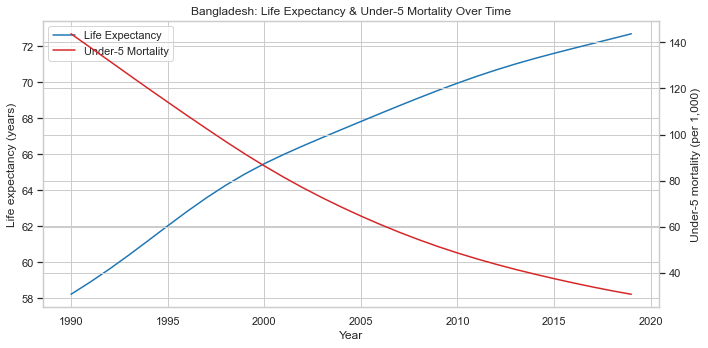

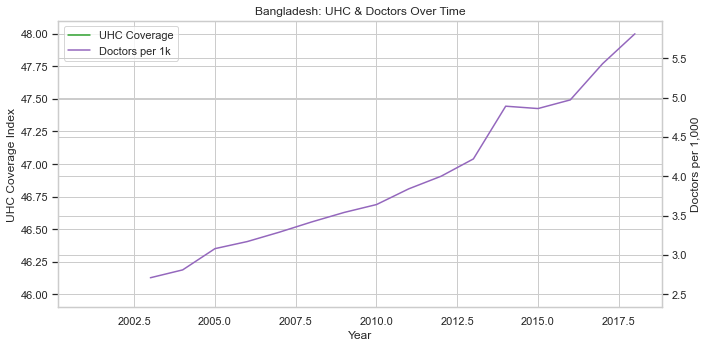

In [11]:
# ------------------------------------------------
# 10. Country time-series example
# ------------------------------------------------
example_country = "Bangladesh"  # change to another country if you like

if example_country in df["country"].unique():
    df_country = df[df["country"] == example_country].sort_values("year")

    cols_available = [c for c in ["life_expectancy", "under5_mortality_rate", "uhc_coverage", "doctors"] if c in df_country.columns]
    print(f"\nTime series for {example_country} (available columns):", cols_available)
    display(df_country[["year"] + cols_available].head())

    # Life expectancy vs under-5 mortality over time
    if {"life_expectancy", "under5_mortality_rate"}.issubset(df_country.columns):
        fig, ax1 = plt.subplots(figsize=(10, 5))

        ax1.plot(df_country["year"], df_country["life_expectancy"], label="Life Expectancy", color="tab:blue")
        ax1.set_ylabel("Life expectancy (years)")

        ax2 = ax1.twinx()
        ax2.plot(df_country["year"], df_country["under5_mortality_rate"], label="Under-5 Mortality", color="tab:red")
        ax2.set_ylabel("Under-5 mortality (per 1,000)")

        ax1.set_xlabel("Year")
        ax1.set_title(f"{example_country}: Life Expectancy & Under-5 Mortality Over Time")

        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc="best")

        plt.tight_layout()
        plt.show()

    # UHC and doctors over time (if available)
    if {"uhc_coverage", "doctors"}.issubset(df_country.columns):
        fig, ax1 = plt.subplots(figsize=(10, 5))

        ax1.plot(df_country["year"], df_country["uhc_coverage"], label="UHC Coverage", color="tab:green")
        ax1.set_ylabel("UHC Coverage Index")

        ax2 = ax1.twinx()
        ax2.plot(df_country["year"], df_country["doctors"], label="Doctors per 1k", color="tab:purple")
        ax2.set_ylabel("Doctors per 1,000")

        ax1.set_xlabel("Year")
        ax1.set_title(f"{example_country}: UHC & Doctors Over Time")

        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc="best")

        plt.tight_layout()
        plt.show()
else:
    print(f"Example country '{example_country}' not found in dataset. Choose another one.")
